In [1]:
import numpy as np
## UNCOMMENT FOR INTERACTIVE PLOTS
# %matplotlib notebook   
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits import mplot3d
from numpy import linalg as LA
from astropy import units as u
from astropy import constants as const

In [2]:
from trajectory_calculation import falling_trajectory

In [3]:
# x0 = 500  # R.A.
# y0 = 500  # Decl.
# z0 = 100  # Radial dist.
# vx0 = 1
# vy0 = 2
# vz0 = -1

x0 = -500  # R.A.
y0 = -500  # Decl.
z0 = -500  # Radial dist.
vx0 = 4
vy0 = 2
vz0 = 1

Ms_val = 15#Ms_vals[3]#*u.solMass

rt,vt,rt_spherical,vt_spherical = falling_trajectory(x0,y0,z0,vx0,vy0,vz0,Ms_val,ang_range = 2*np.pi)

Initial coords in rotated cartesian frame: [-5.68434189e-14  8.66025404e+02  5.68434189e-14]
Initial coords in spherical frame: [866.02540378   1.57079633   1.57079633]
Can we get back the original coords?: True
Initial vel. in rotated cartesian frame: [-2.1602469  -4.04145188  0.        ]
Initial vel. in spherical frame: [-4.04145188e+00 -2.47467556e-16  2.16024690e+00]
Total energy: -4.865505391276676 km2 / s2
Orbit eccentricity: 0.8986987087880236


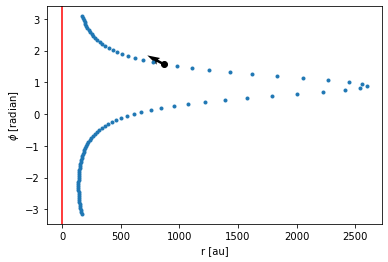

In [5]:
## Trajectory in r & phi(azimuthal angle) domain

pos1 = rt_spherical[0]
pos2 = rt_spherical[2]
vel1 = vt_spherical[0]
vel2 = vt_spherical[2]
plt.plot(pos1,pos2,'.')
plt.plot(pos1[0],pos2[0],'ko')
plt.quiver(pos1[0],pos2[0],vel1[0],vel2[0])
plt.axvline(x=0,color = 'red')
#plt.plot(0,0,'r*')
plt.xlabel("r [au]")
plt.ylabel(r"$\phi$ [radian]")
plt.show()

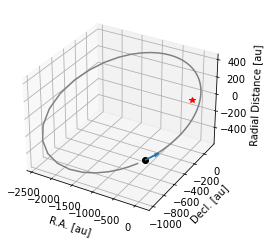

In [6]:
## Trajectory in original cartesian domain

fig = plt.figure()
ax = plt.axes(projection='3d')
x_t = rt[0]
y_t = rt[1]
z_t = rt[2]
ax.plot3D(x_t, y_t, z_t, 'gray')#, marker = 'o')
ax.plot3D(x0,y0,z0, 'ko')
ax.plot3D(0,0,0, 'r*')
ax.quiver(x0,y0,z0,vx0,vy0,vz0,length=50)

ax.set_xlabel('R.A. [au]')
ax.set_ylabel('Decl. [au]')
ax.set_zlabel('Radial Distance [au]')
plt.show()


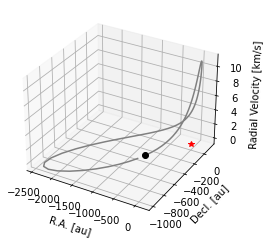

In [7]:
## Trajectory in data cubes' domain

fig = plt.figure()
ax = plt.axes(projection='3d')
x_t = rt[0]#[:10]
y_t = rt[1]#[:10]
vz_t = vt[2]#[:10]
ax.plot3D(x_t, y_t, vz_t, 'gray')
ax.plot3D(x0, y0, vz0, 'ko')
ax.plot3D(0,0,0, 'r*')
ax.set_xlabel('R.A. [au]')
ax.set_ylabel('Decl. [au]')
ax.set_zlabel('Radial Velocity [km/s]')
plt.show()


## Still work in progress below (checks and loops)

In [88]:
pos1 = rt_spherical[0]*u.au
vel1 = vt_spherical[0]*u.km/u.s
pos2 = rt_spherical[2]#*u.rad
vel2 = vt_spherical[2]*u.km/u.s

dx = pos1[1:]-pos1[:-1]
dphi = (pos2[1:]-pos2[:-1])%(2*np.pi)
v1_avg = (vel1[1:]+vel1[:-1])/2
v2_avg = (vel2[1:]+vel2[:-1])/2
# x2 = np.cumsum(dx)

dt = (dx/v1_avg).to(u.yr)
time = np.cumsum(dt)

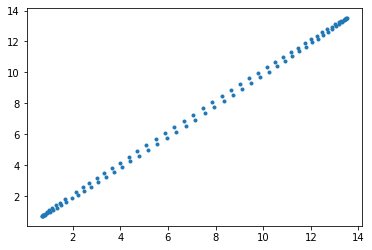

In [90]:
plt.plot((pos1[1:]*dphi/dt).to(vel2.unit),v2_avg,'.')
# plt.xlim(-0.1,0.5)

In [82]:
np.trapz(v_avg,time).to(u.au)

<Quantity 690.70142127 AU>

In [87]:
pos1[-1]

<Quantity 976.29429766 AU>

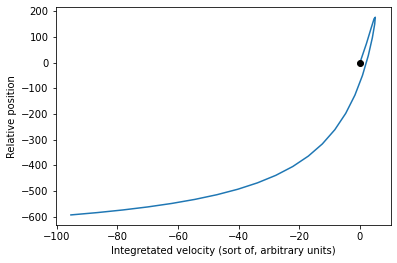

In [7]:
pos1 = rt_spherical[0]
vel1 = vt_spherical[0]
# pos1 = rt[2]
# vel1 = vt[2]

vel1_int = [np.sum(vel1[:i]) for i in range(len(vel1))]
plt.plot(vel1_int,(pos1-pos1[0]),'-')
plt.plot(0,0,'ko')
plt.xlabel("Integretated velocity (sort of, arbitrary units)")
plt.ylabel("Relative position")
plt.show()

In [26]:
x0 = -500  # R.A.
y0 = -500  # Decl.
z0 = -500  # Radial dist.
vx0 = 0
vy0 = 2
vz0 = 1

Ms_vals = np.logspace(-1,1,6)
rts = []
vts = []
for Ms_val in Ms_vals:
    print(Ms_val)
    rt,vt,_,_ = falling_trajectory(x0,y0,z0,vx0,vy0,vz0,Ms_val,verbose = False,ang_range = 0.5*np.pi)
    rts += [rt]
    vts += [vt]

0.1
0.251188643150958
0.6309573444801934
1.584893192461114
3.981071705534973
10.0


<IPython.core.display.Javascript object>


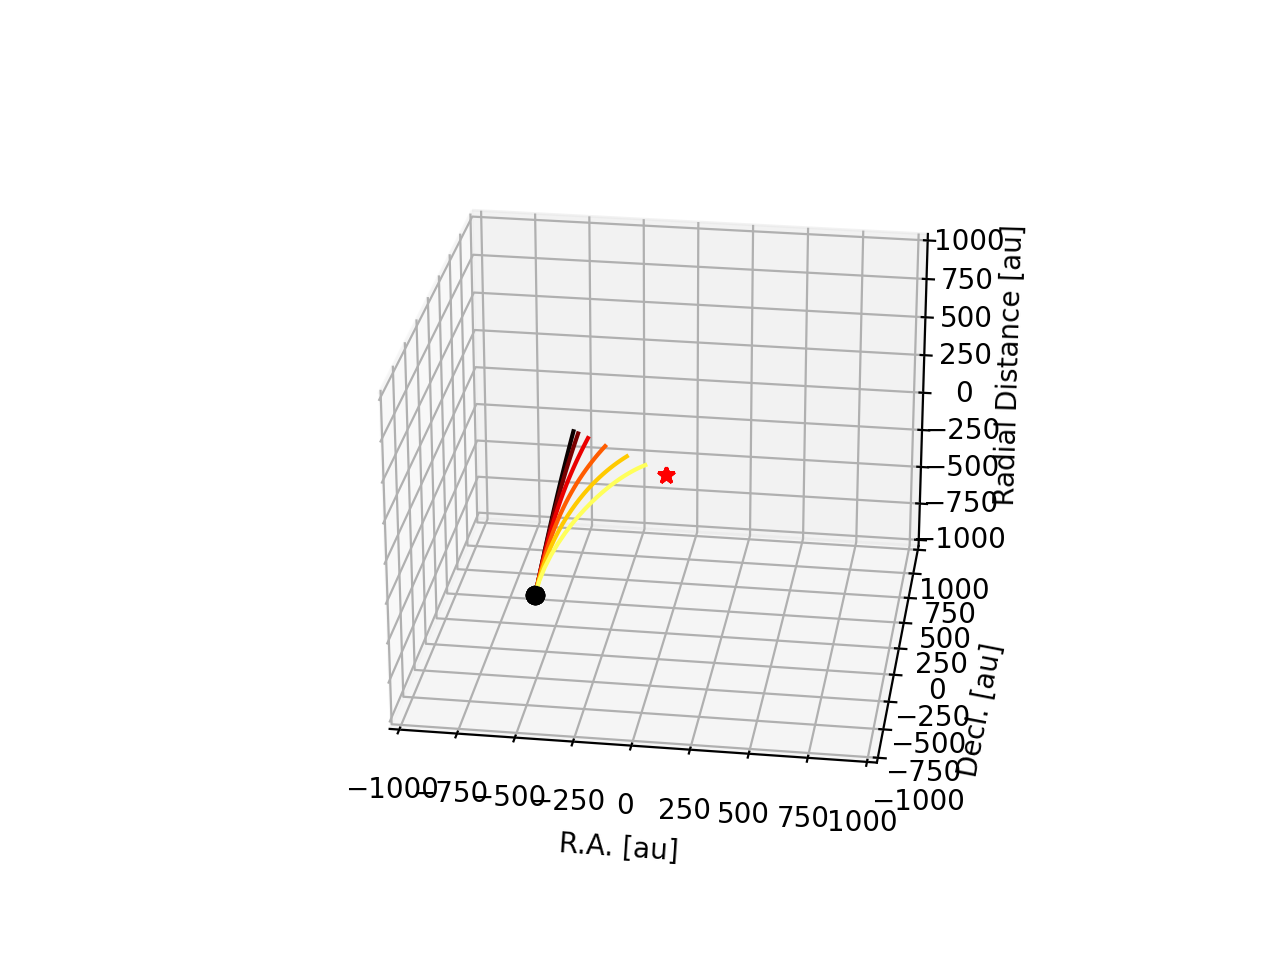

In [27]:
fig = plt.figure()
ax = plt.axes(projection='3d')
for i in range(len(Ms_vals)):
    rt = rts[i]
    x_t = rt[0]
    y_t = rt[1]
    z_t = rt[2]
    ax.plot3D(x_t, y_t, z_t, c = cm.hot(range(len(Ms_vals))[i]/len(Ms_vals)))#, marker = 'o')
    ax.plot3D(x0,y0,z0, 'ko')
    ax.plot3D(0,0,0, 'r*')
ax.set_xlabel('R.A. [au]')
ax.set_ylabel('Decl. [au]')
ax.set_zlabel('Radial Distance [au]')
ax.set_xlim(-1000,1000)
ax.set_ylim(-1000,1000)
ax.set_zlim(-1000,1000)
plt.show()


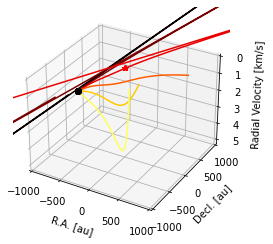

In [10]:
fig = plt.figure()
ax = plt.axes(projection='3d')
for i in range(len(Ms_vals)):
    rt = rts[i]
    x_t = rt[0]
    y_t = rt[1]
    vz_t = vts[i][2]
    ax.plot3D(x_t, y_t, vz_t, c = cm.hot(range(len(Ms_vals))[i]/len(Ms_vals)))#, marker = 'o')
    ax.plot3D(x0,y0,vz0, 'ko')
    ax.plot3D(0,0,0, 'r*')
ax.set_xlabel('R.A. [au]')
ax.set_ylabel('Decl. [au]')
ax.set_zlabel('Radial Velocity [km/s]')
ax.set_xlim(-1000,1000)
ax.set_ylim(-1000,1000)

ax.invert_zaxis()

plt.show()
